In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [4]:
#Import Dataset
data=pd.read_csv("diamonds.csv")

In [5]:
#High Level Overview of data
data.shape

(53940, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
#Data Cleaning and Pre-processing
data=data.drop(["Unnamed: 0"],axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
#Check 0 and Null values
print("Number of rows with x==0:{}".format((data.x==0).sum()))
print("Number of rows with y==0:{}".format((data.y==0).sum()))
print("Number of rows with z==0:{}".format((data.z==0).sum()))
print("Number of rows with depth==0:{}".format((data.depth==0).sum()))

Number of rows with x==0:8
Number of rows with y==0:7
Number of rows with z==0:20
Number of rows with depth==0:0


In [11]:
data[['x','y','z']]=data[['x','y','z']].replace(0,np.NaN)
data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [13]:
data["volume"]=data['x']*data['y']*data['z']
data.drop(['x','y','z'],axis=1,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


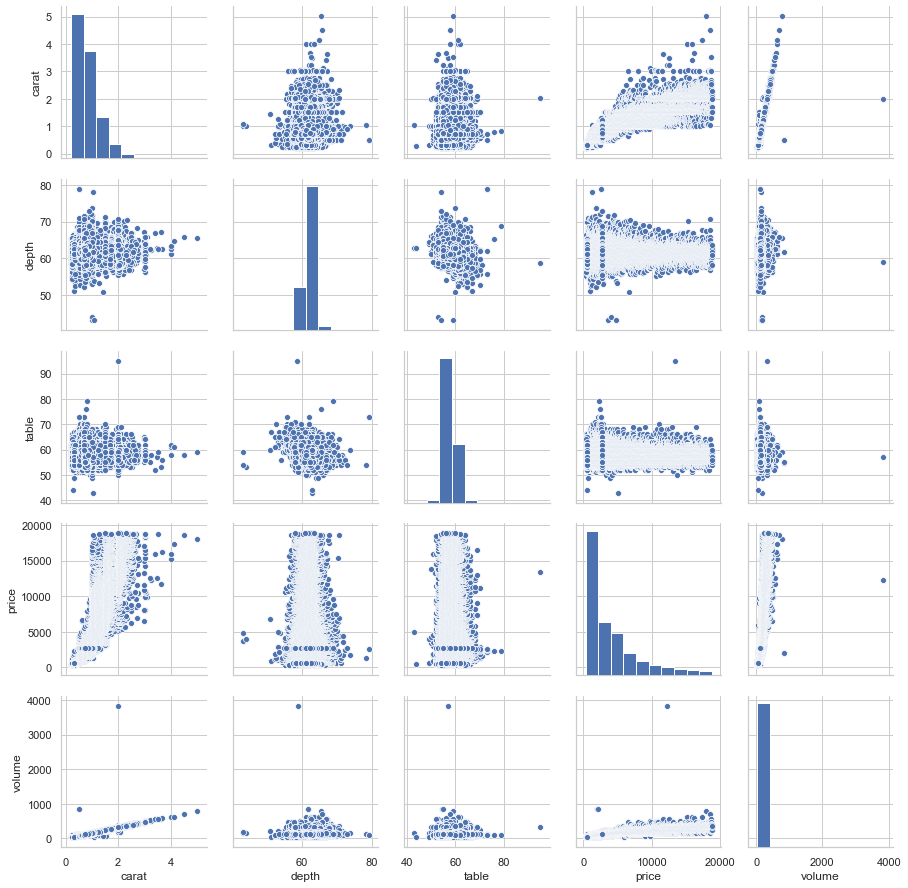

In [14]:
#Outlier Analysis
sns.pairplot(data)

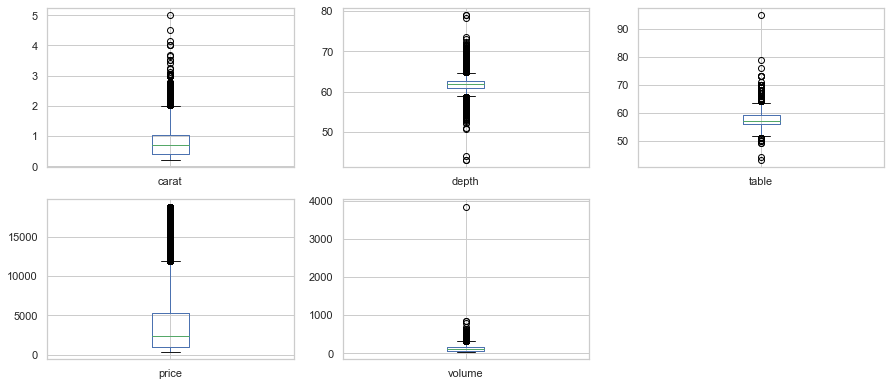

In [15]:
data.plot(kind="box",figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [17]:
#Function to remove outliers
def outliers(var):
    a=[]
    q1=data[var].quantile(.25)
    q2=data[var].quantile(.5)
    q3=data[var].quantile(.75)
    iqr=q3-q1
    ulim=float(q3+(1.5*iqr))
    llim=float(q1-(1.5*iqr))
    
    for i in data[var]:
        if i>ulim:
            i=np.NaN
        elif i<llim:
            i=np.NaN
        else:
            i=i
        a.append(i)
    return a

for col in data.select_dtypes(exclude="object").columns:
    data[col]=outliers(col)

In [18]:
for i in data.select_dtypes(exclude="object").columns:
    data[i]=data[i].fillna(data[i].mean())

In [19]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

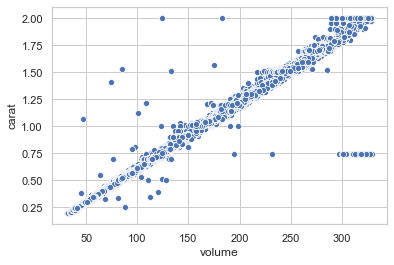

In [21]:
#Data Visualization
sns.scatterplot(data=data,x=data["volume"],y=data["carat"])

In [22]:
#Analysing Numerical and Categorical data
numerical_cols=data.select_dtypes(include=np.number).columns.to_list()
categorical_cols=data.select_dtypes(exclude=np.number).columns.to_list()

In [23]:
numerical_cols

['carat', 'depth', 'table', 'price', 'volume']

In [24]:
categorical_cols

['cut', 'color', 'clarity']

In [25]:
data["cut"].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

In [26]:
data["color"].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

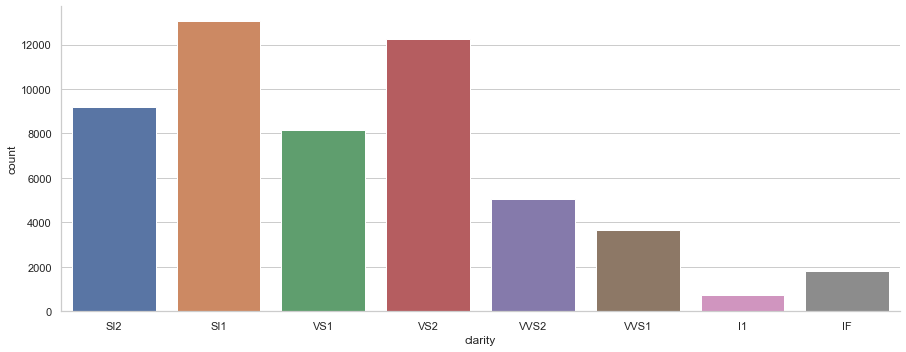

In [27]:
sns.catplot("clarity",data=data,kind="count",aspect=2.5)

In [28]:
#Label Encoding categorical data
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

data["cut"]=le.fit_transform(data["cut"])
data["color"]=le.fit_transform(data["color"])
data["clarity"]=le.fit_transform(data["clarity"])
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.500000,55.000000,326.0,38.202030
1,0.21,3,1,2,59.800000,61.000000,326.0,34.505856
2,0.23,1,1,4,61.776344,57.373199,327.0,38.076885
3,0.29,3,5,5,62.400000,58.000000,334.0,46.724580
4,0.31,1,6,3,63.300000,58.000000,335.0,51.917250


In [29]:
#Segregating Features and Labels
X=data.drop(["price"],axis=1)
y=data["price"]

In [30]:
#Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=142)

In [31]:
#Linear Regression Model
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test,predictions))))
print("R2:{}".format(np.sqrt(r2_score(y_test,predictions))))

RMSE:1515.0182428770092
R2:0.8309141106203027


In [32]:
#Improving results by using RandomForestRegresor
model=RandomForestRegressor()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test,predictions))))
print("R2:{}".format(np.sqrt(r2_score(y_test,predictions))))

C:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE:880.8489891129308
R2:0.9462289387632428


In [34]:
#Improving results using GridSearchCV
n_estimators=[int(x) for x in np.linspace(10,200,10)]
max_depth=[int(x) for x in np.linspace(10,100,10)]
min_samples_split=[2,3,4,5,10]
min_samples_leaf=[1,2,4,10,15,20]
random_grid={'n_estimators':n_estimators,"max_depth":max_depth,
              "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}
random_grid

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20]}

In [ ]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3)
rf_random.fit(X_train,y_train)
predictions=rf_random.predict(X_test)
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test,predictions))))
print("R2:{}".format(np.sqrt(r2_score(y_test,predictions))))

In [ ]:
rf_random.best_params_

In [ ]:
rf=RandomForestRegressor(n_estimators=73,min_samples_split=3,min_samples_leaf=4,max_depth=40)
rf.fit(X_train,y_train)
predictions=rf.predict(X_test)
print("RMSE:{}".format(np.sqrt(mean_squared_error(y_test,predictions))))
print("R2:{}".format(np.sqrt(r2_score(y_test,predictions))))